## Анализ объявлений об аренде квартир

##### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pymystem3 import Mystem

##### Настройка

In [2]:
# сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

##### Анализ файла

In [3]:
path = '/home/rushana/ds_bootcamp/01-01/ds-phase-0/learning/datasets/cian.csv'
cian = pd.read_csv(path)

In [4]:
cian.head(3)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0000,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5000,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2000,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086


In [5]:
# cian.info()

In [6]:
# cian.describe()

In [7]:
# В датасете содержится 23 368 объявлений об аренде квартир. Почти все данные имеют тип 'object' и только "ID объявления" и "Высота потолков, м" имеют числовый тип представления данных.

# Предварительный анализ переменной "Высота потолков, м" указывает на наличие ошибок в датасете (минимальная высота - 1,2 м., а максимальная 320 м.). Необходимо подробнее изучить эти данные и, скорее всего, или исключить их из датасета или попробовать заменить очевидно ошибочные данные на более адекватные (например, мединные или средние значения других квартир в этом же доме). 

In [8]:
# cian.isna().mean()

Переименуем столбцы

In [9]:
cian.columns

Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро',
       'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны',
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')

In [10]:
cian.columns = ['Unnamed: 0', 'ID_ad', 'rooms', 'type', 'metro', 'address', 'area_m2', 'house', 'parking', 'price', 'phone', 
                'description', 'renovation', 'rooms_area_m2', 'loggia', 'windows', 'bathroom', 'possible_with_children_pets', 
                'additionally', 'rc_name', 'house_series', 'ceiling_height', 'lift', 'garbage_chute', 'link']

In [11]:
cian.nunique()

Unnamed: 0                     23368
ID_ad                          23368
rooms                             24
type                               1
metro                           5866
address                        12850
area_m2                        11255
house                           2565
parking                            5
price                           3922
phone                          13172
description                    23078
renovation                         4
rooms_area_m2                   3990
loggia                            18
windows                            3
bathroom                          20
possible_with_children_pets        3
additionally                     528
rc_name                         1798
house_series                     393
ceiling_height                    95
lift                              34
garbage_chute                      2
link                           23368
dtype: int64

Удалим из датасета столбцы *Unnamed: 0* (дублирует индекс строк), *type* (значение этой переменной одинаково для всех объявлений), *rk_name*, *house_series*, *link*, *phone* и *ID_ad* (значения данных столбцов не оказывают влияния на величину арендной платы)

In [12]:
cian = cian.drop(['Unnamed: 0', 'ID_ad', 'type', 'link', 'phone', 'rc_name', 'house_series'], axis = 'columns')
cian.head(3)

,rooms,metro,address,area_m2,house,parking,price,description,renovation,rooms_area_m2,loggia,windows,bathroom,possible_with_children_pets,additionally,ceiling_height,lift,garbage_chute
0,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0000,"Пасс (4), Груз (1)",Да
1,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5000,"Пасс (1), Груз (1)",Нет
2,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2000,Пасс (1),NaN


Удалим полностью дублирующиеся строки

In [13]:
len(cian[cian.duplicated()])

8

In [14]:
cian = cian.drop_duplicates()

Оставим в датасете объявления только по Москве

In [15]:
address = cian['address'].str.split(',',expand=True)

In [16]:
address[0].value_counts()

Москва                19729
Санкт-Петербург        3028
Краснодарский край      603
Name: 0, dtype: int64

In [17]:
cian = cian[cian['address'].str.contains('Москва')]

In [18]:
cian.isna().mean()

rooms                         0.0271
metro                         0.0175
address                       0.0000
area_m2                       0.0000
house                         0.0000
parking                       0.5663
price                         0.0000
description                   0.0000
renovation                    0.1248
rooms_area_m2                 0.3663
loggia                        0.3357
windows                       0.2610
bathroom                      0.1035
possible_with_children_pets   0.2490
additionally                  0.0138
ceiling_height                0.4662
lift                          0.2124
garbage_chute                 0.4055
dtype: float64

Данные содержат множество пропусков. Какие-то пропущенные значения мы можем восполнить, какие-то придется оставить в датасете, но указать, что данные пропущены, а некоторые характеристики проще полностью исключить, поскольку пропусков больше, чем заполненных данных.

Пропущенные значения содержатся в следующих переменных, %:

1. Количество комнат-------------------2.71 
2. Метро ---------------------------------------1.75 *можно заполнить на основании других объявлений об аренде квартир в этом же доме*
3. Парковка---------------------------------56.63 *можно заполнить на основании других объявлений об аренде квартир в этом же доме*
4. Ремонт ------------------------------------12.48 *пропусков много, но заполнить их по имеющейся информации невозможно. Оставим в датасете, но укажем, что данные отсутствуют*
5. Площадь комнат, м2 ---------------36.63 *пропусков много, но заполнить их по имеющейся информации невозможно. Оставим в датасете, но укажем, что данные отсутствуют*
6. Балкон ------------------------------------33.57 *пропусков много, но заполнить их по имеющейся информации невозможно. Оставим в датасете, но укажем, что данные отсутствуют*
7. Окна ---------------------------------------26.10 *пропусков много, но заполнить их по имеющейся информации невозможно. Оставим в датасете, но укажем, что данные отсутствуют*
8. Санузел -----------------------------------10.35 *пропусков много, но заполнить их по имеющейся информации невозможно. Оставим в датасете, но укажем, что данные отсутствуют*
9. Можно с детьми/животными-- 24.90 *пропусков много, но заполнить их по имеющейся информации невозможно. Оставим в датасете, но укажем, что данные отсутствуют*
10. Дополнительно-------------------------1.38
11. Название ЖК -------------------------- 77.43 *очень много пропущенных данных, поэтому имеет смысл вообще отказаться от этого параметра и исключить его из датасета*
12. Серия дома------------------------------89.40 *очень много пропущенных данных, поэтому имеет смысл вообще отказаться от этого параметра и исключить его из датасета*
13. Высота потолков, м-----------------46.62
14. Лифт----------------------------------------21.24
15. Мусоропровод ------------------------40.55 *очень много пропущенных данных, поэтому имеет смысл вообще отказаться от этого параметра и исключить его из датасета*


Для работы с категориальными признаками воспользуемся one-hot-кодированием. Для кодируемого категориального признака создаются N новых признаков, где N — число категорий. Каждый i-й новый признак — бинарный характеристический признак i-й категории. Создадим специальную функцию для one-hot-кодирования.

In [19]:
def code_ohe (data, feature):
    for i in data[feature].unique():
        data[feature + '=' + i] = (data[feature] == i).astype(int)
    data = data.drop([feature], axis = 'columns')

## price

Выделим в отдельный столбец величину ежемесячной арендной платы

In [20]:
cost = cian['price'].str.split(',', expand=True)
cian['rent_cost'] = cost[0].str.split(' ')
cian['rent_cost'] = [float(x[0]) for x in cian['rent_cost']]

In [21]:
cian = cian.drop(['price'], axis = 'columns')

In [22]:
cian.describe()

,ceiling_height,rent_cost
count,10532.0000,19729.0000
mean,2.9929,86556.5310
std,7.8539,128163.7616
min,1.2000,5000.0000
25%,2.6400,39990.0000
50%,2.6400,50000.0000
75%,2.8000,75000.0000
max,320.0000,3000000.0000


Стандартное отклонение почти в полтора раза больше среднего арифметического, что указывает на большой разброс данных. Это обусловлено наличием объявлений с очень высокой стоимостью (до 3 млн руб.). Сделаем нашу выборку чуть более сглаженной. Исключим из датасета объявления стоимостью выше 350 000 руб.

In [23]:
cian = cian[cian['rent_cost'] < 350000]

In [24]:
cian.describe()

,ceiling_height,rent_cost
count,10243.0000,19004.0000
mean,2.9849,67687.8554
std,7.9634,52970.4191
min,1.2000,5000.0000
25%,2.6400,39000.0000
50%,2.6400,50000.0000
75%,2.8000,70000.0000
max,320.0000,349999.0000


Мы избавились менее, чем от 4% объявлений, но зато теперь наша выборка стала более равномерной. 

## rooms

Избавляемся от пропусков в *rooms* и преобразовываем информацию в числовой тип данных

In [25]:
cian['rooms'].isna().mean()

0.027994106503893917

Менее, чем в 3% обьявлений не указано количество комнат. Скорее всего, речь идет или о студиях или о квартирах со свободными планировками. Заполним пропуски 0.

In [26]:
cian = cian.astype({'rooms': str})
cian['rooms'] = cian['rooms'].replace('nan', '0')

In [27]:
cian['rooms'].unique()

array(['2', '3', '4', '4, Оба варианта', '3, Изолированная',
       '5, Изолированная', '5, Оба варианта', '2, Оба варианта',
       '3, Оба варианта', '5', '1', '2, Изолированная', '0',
       '4, Изолированная', '2, Смежная', '4, Смежная', '3, Смежная',
       '1, Изолированная', '1, Оба варианта', '5, Смежная', '6',
       '6, Оба варианта', '6, Изолированная', '6, Смежная', '1, Смежная'],
      dtype=object)

Разделим информацию на несколько новых столбцов: количество комнат (*:int*), тип комнаты (*:str*)

In [28]:
cian['rooms:Q'] = [int(row.split(', ')[0]) if len(row.split(', ')[0]) == 1 else 0 for row in cian['rooms']]

In [29]:
cian['room_type'] = [row.split(', ')[-1] if len(row.split(', ')[-1]) > 6 else 'unknown' for row in cian['rooms']]

In [30]:
len(cian[cian['room_type'] == 'unknown']) / len(cian)

0.5905598821300779

В 60% объявлений не указан тип комнаты. Исключим этот показатель и исходный *room* из датасета

In [31]:
cian = cian.drop(['rooms', 'room_type'], axis = 'columns')

In [32]:
cian.sample(2)

,metro,address,area_m2,house,parking,description,renovation,rooms_area_m2,loggia,windows,bathroom,possible_with_children_pets,additionally,ceiling_height,lift,garbage_chute,rent_cost,rooms:Q
4134,м. Минская (4 мин на машине),"Москва, Мосфильмовская улица, 8",100.0,"8/53, Монолитный",подземная,Без комиссии для нанимателя! Предлагается трех...,Дизайнерский,NaN,NaN,Во двор,Совмещенный (2),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0000,Пасс (3),Да,230000.0000,3
22011,м. Тульская (9 мин пешком),"Москва, Люсиновская улица, 60",90.0/52.0/15.0,"15/15, Блочный",наземная,Сдаётся на длительный срок трёхкомнатная кварт...,Евроремонт,52,"Балкон (1), Лоджия (1)",Во двор,"Совмещенный (1), Раздельный (1)","Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,"Пасс (1), Груз (1)",Да,85000.0000,3


In [33]:
cian['rooms:Q'].describe()

count   19004.0000
mean        1.8888
std         0.9444
min         0.0000
25%         1.0000
50%         2.0000
75%         2.0000
max         6.0000
Name: rooms:Q, dtype: float64

## metro

Проверим количество пропущенных значений

In [34]:
cian['metro'].isna().mean()

0.01810145232582614

Заполним пропущенные значения. Данные для заполнения будем брать из других объявлений по аналогичному адресу. 

In [35]:
cian.loc[cian["metro"].isna(), "metro"] = cian.loc[cian["metro"].isna(), "address"].map(cian.groupby("address")["metro"].first())

In [36]:
cian['metro'].isna().mean()

0.010945064197011155

Выделим в отдельный столбец название ближайшей станции метро.

In [37]:
cian[['metro_name', 'time_to_metro']] = cian['metro'].str.split('(', expand=True)
cian['metro_name'] = cian['metro_name'].str.strip('м. ')

Заполним оставшиеся пропуски значением 'unknown'

In [38]:
cian['metro_name'] = cian['metro_name'].fillna('unknown')

In [39]:
pd.DataFrame(cian.groupby(['metro_name'])['rent_cost'].median().round()).reset_index().sort_values(by='rent_cost')

,metro_name,rent_cost
269,Щербинка,30000.0000
0,unknown,33000.0000
161,Павшино,33500.0000
139,Некрасовка,34250.0000
272,Юго-Восточная,35000.0000
...,...,...
58,Деловой центр,239500.0000
100,Кузнецкий мост,240000.0000
115,Лужники,250000.0000
114,Лубянка,250000.0000


In [40]:
# создадим функцию для кодирования категориальных переменных через медиану
def code_median(column):
    return (cian[column].map(cian.groupby(column)['rent_cost'].median()))

In [41]:
cian['metro_name_code'] = code_median('metro_name')

In [42]:
cian.sample(3)

,metro,address,area_m2,house,parking,description,renovation,rooms_area_m2,loggia,windows,bathroom,possible_with_children_pets,additionally,ceiling_height,lift,garbage_chute,rent_cost,rooms:Q,metro_name,time_to_metro,metro_name_code
16561,м. Академическая (8 мин пешком),"Москва, улица Шверника, 8/1К1",50.0/32.0/8.5,"3/5, Блочный",наземная,"Елена. Чистая, уютная квартира, укомплектована...",Косметический,20-12,Балкон (1),На улицу,Раздельный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.9500,NaN,NaN,41000.0000,2,Академическая,8 мин пешком),60000.0000
20136,м. Южная (18 мин пешком),"Москва, Чертановская улица, 32К1",74.0/52.0/10.0,"1/16, Панельный",открытая,Андрей. ВСЕХ ВСЕХ ВСЕХ порядочных!!!! Квартира...,Косметический,16-18-18,NaN,Во двор,Раздельный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Стиральная...",3.0000,Пасс (1),Нет,65000.0000,3,Южная,18 мин пешком),45000.0000
6361,м. Селигерская (6 мин пешком),"Москва, Ильменский проезд, 17к3",35.0/14.0/11.0,"11/21, Монолитный",подземная,СДАЁТСЯ ВПЕРВЫЕ!!!\n\nСдаётся на длительный ср...,Евроремонт,14,NaN,На улицу,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,"Пасс (1), Груз (1)",NaN,50000.0000,1,Селигерская,6 мин пешком),43000.0000


In [43]:
# удалим лишние столбцы
cian = cian.drop(['metro', 'metro_name', 'time_to_metro'], axis = 'columns')

## area_m2

In [44]:
cian['area_m2'].value_counts()

40.0/20.0/10.0    214
45.0/30.0/6.0     107
40.0               92
40.0/20.0/9.0      81
38.0/20.0/10.0     76
                 ... 
26.0/16.0/8.0       1
31.0/17.8/7.0       1
40.1/28.0/6.0       1
30.0/18.4/5.6       1
90.0/48.2/15.5      1
Name: area_m2, Length: 9089, dtype: int64

В колонке *area_m2* оставим только общую площадь квартир .

In [45]:
cian['area_m2'] = [float(row.split('/')[0]) for row in cian['area_m2']]

In [46]:
cian['area_m2'].value_counts()

40.0000     1095
45.0000      896
38.0000      870
35.0000      648
60.0000      580
            ... 
189.1000       1
109.9000       1
78.1000        1
48.6000        1
91.6000        1
Name: area_m2, Length: 812, dtype: int64

## house

Разделим информацию в колонке *house* на несколько новых столбцов: этаж (*:int*), этажность дома (*:int*), тип дома (*:str*).

In [47]:
cian['house'].value_counts()

3/5, Кирпичный      262
4/5, Кирпичный      240
2/5, Кирпичный      216
1/5, Кирпичный      202
5/5, Кирпичный      198
                   ... 
6/13, Сталинский      1
15/21, Кирпичный      1
15/19, Кирпичный      1
8/19, Кирпичный       1
2/2, Блочный          1
Name: house, Length: 2324, dtype: int64

In [48]:
# выделим в отдельную колонку этаж квартиры
cian['floor'] = [int(row.split('/')[0]) for row in cian['house']]

In [49]:
# выделим в отдельную колонку этажность дома
cian['total_floors'] = [int(row.split('/')[1].split(',')[0]) for row in cian['house']]

In [50]:
# выделим в отдельную колонку тип дома
cian['types'] = [row.split(', ')[-1] if len(row.split(', ')[-1]) > 6 else 'unknown' for row in cian['house']]

In [51]:
cian['types'].value_counts()

Панельный              6674
Кирпичный              3606
Монолитный             3428
unknown                2667
Блочный                1686
Монолитно-кирпичный     747
Сталинский              138
старый фонд              52
Деревянный                5
Щитовой                   1
Name: types, dtype: int64

Заполним пропущенные значения. Данные для заполнения будем брать из других объявлений по аналогичному адресу. 

In [52]:
cian.loc[cian["types"] == 'unknown', "types"] = cian.loc[cian["types"] == 'unknown', "address"].map(cian.groupby("address")["types"].first())

In [53]:
cian['types'].value_counts()

Панельный              6973
Кирпичный              3795
Монолитный             3706
Блочный                1731
unknown                1713
Монолитно-кирпичный     867
Сталинский              148
старый фонд              64
Деревянный                6
Щитовой                   1
Name: types, dtype: int64

Нам удалось избавиться только от части пропусков. Остальные пропущенные значения остаются unknown. Переведем типы домов на английский язык

In [54]:
dict = {"Панельный": 'panel', "Кирпичный": 'brick', "Монолитный": 'monolithic',
        "Блочный": 'block', "Монолитно-кирпичный": 'mono_brick', "Сталинский": 'stalin', 
        "старый фонд": 'old_fond', "Деревянный": 'wood', "Щитовой": 'panel'}
cian=cian.replace({"types": dict})

У переменной *house_type* очень много значений. Чтобы не утяжелять датафрейм создавая бинарные переменные, воспользуемся кодировкой. Закодируем типы домов медианной ценой (мы выбираем медиану, а не среднее, поскольку разброс цены относительно среднего арифметического очень большой и в таких ситуациях лучше ориентироваться на медиану, которая меньше искажается под действием выбросов)

In [55]:
# создаем графики зависимости категориальных данных к цене, то есть мы хотим понимать сильно ли влияет категория на медианную стоимость аренды
def plot_median_price(column):
    plt.figure(figsize=(20, 4)) # определение размера графиков
    n_bars = np.arange(len(cian[column].unique())) # массив с кол-вом уникальных значений в каждой катег колонке.
    
    # создание датасета по каждой колонке группируя категории по средней цене
    grouped = pd.DataFrame(cian.groupby([column])['rent_cost'].median().round())
    
    plt.title(column) #  заголовок
    plt.bar(n_bars, grouped['rent_cost']) # создание графика
    plt.xticks(n_bars, grouped.index); # подписываем колонки
    plt.show() # чтобы не накладывался на один график

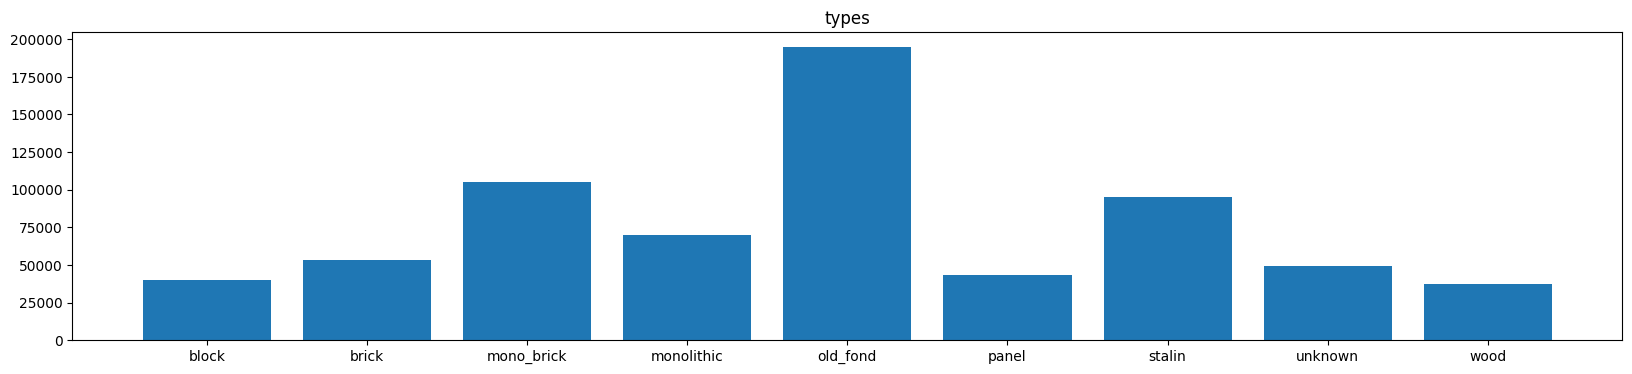

In [56]:
plot_median_price('types')

In [57]:
pd.DataFrame(cian.groupby(['types'])['rent_cost'].median().round()).reset_index().sort_values(by='rent_cost')

,types,rent_cost
8,wood,37500.0000
0,block,40000.0000
5,panel,43000.0000
7,unknown,49000.0000
1,brick,53000.0000
3,monolithic,70000.0000
6,stalin,95000.0000
2,mono_brick,105200.0000
4,old_fond,195000.0000


In [58]:
cian['house_type'] = code_median('types')

In [59]:
# удалим столбцы types и house
cian = cian.drop(['types', 'house'], axis = 'columns')

In [60]:
cian.head(3)

,address,area_m2,parking,description,renovation,rooms_area_m2,loggia,windows,bathroom,possible_with_children_pets,additionally,ceiling_height,lift,garbage_chute,rent_cost,rooms:Q,metro_name_code,floor,total_floors,house_type
4,"Москва, улица Новый Арбат, 15",58.0000,NaN,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9000,"Пасс (1), Груз (1)",Да,225000.0000,2,190000.0000,12,26,43000.0000
7,"Москва, улица Арбат, 43С3",98.0000,подземная,Лот 112453. Ирина Панченко.\n\nБонус агенту 40...,Евроремонт,26 22 15,NaN,Во двор,"Совмещенный (1), Раздельный (1)","Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2000,Пасс (1),Нет,250000.0000,3,170000.0000,2,4,70000.0000
8,"Москва, Новинский бульвар, 18С1",120.0000,открытая,Лот 71833. Евгений Николаев.\n\nБонус агенту 1...,Евроремонт,45 25 25,NaN,На улицу,Совмещенный (1),Можно с животными,"Мебель на кухне, Ванна, Стиральная машина, Кон...",3.0000,Пасс (1),Нет,130000.0000,3,170000.0000,5,10,95000.0000


## parking

In [61]:
cian['parking'].value_counts()

наземная          5202
подземная         2190
открытая           693
многоуровневая      98
на крыше             1
Name: parking, dtype: int64

In [62]:
cian['parking'].isna().mean()

0.5693538202483688

Заполним недостающие значения. Данные для заполнения будем брать из других объявлений по аналогичному адресу. Оставшиеся пропуски заполним значением "наземная" (поскольку как минимум наземная парковка всегда есть).

Переведем категориальные значения в булевые (0 - открытая парковка, 1 - закрытая).

In [63]:
cian.loc[cian["parking"].isna(), "parking"] = cian.loc[cian["parking"].isna(), "address"].map(cian.groupby("address")["parking"].first())

In [64]:
cian['parking'] = cian['parking'].fillna('наземная')

In [65]:
dict = {"наземная": 0, "подземная": 1, "открытая": 0, "многоуровневая": 1, "на крыше": 1}
cian=cian.replace({"parking": dict})

In [66]:
cian.head(3)

,address,area_m2,parking,description,renovation,rooms_area_m2,loggia,windows,bathroom,possible_with_children_pets,additionally,ceiling_height,lift,garbage_chute,rent_cost,rooms:Q,metro_name_code,floor,total_floors,house_type
4,"Москва, улица Новый Арбат, 15",58.0000,0,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9000,"Пасс (1), Груз (1)",Да,225000.0000,2,190000.0000,12,26,43000.0000
7,"Москва, улица Арбат, 43С3",98.0000,1,Лот 112453. Ирина Панченко.\n\nБонус агенту 40...,Евроремонт,26 22 15,NaN,Во двор,"Совмещенный (1), Раздельный (1)","Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2000,Пасс (1),Нет,250000.0000,3,170000.0000,2,4,70000.0000
8,"Москва, Новинский бульвар, 18С1",120.0000,0,Лот 71833. Евгений Николаев.\n\nБонус агенту 1...,Евроремонт,45 25 25,NaN,На улицу,Совмещенный (1),Можно с животными,"Мебель на кухне, Ванна, Стиральная машина, Кон...",3.0000,Пасс (1),Нет,130000.0000,3,170000.0000,5,10,95000.0000


## renovation

In [67]:
cian['renovation'].isna().mean()

0.12460534624289624

In [68]:
cian['renovation'] = cian['renovation'].fillna('unknown')

In [69]:
cian['renovation'].value_counts()

Косметический    7335
Евроремонт       6757
Дизайнерский     2412
unknown          2368
Без ремонта       132
Name: renovation, dtype: int64

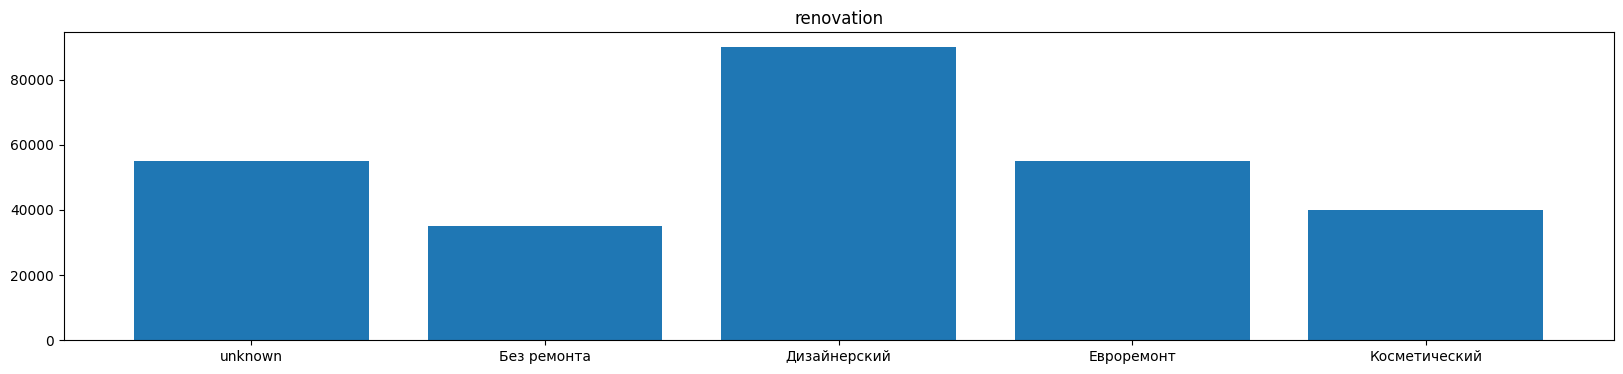

In [70]:
# посморим как распределяется средняя цена между категориями
plot_median_price('renovation')

In [71]:
pd.DataFrame(cian.groupby(['renovation'])['rent_cost'].mean().round()).reset_index()

,renovation,rent_cost
0,unknown,74647.0000
1,Без ремонта,44663.0000
2,Дизайнерский,114099.0000
3,Евроремонт,74358.0000
4,Косметический,44450.0000


In [72]:
pd.DataFrame(cian.groupby(['renovation'])['rent_cost'].median().round()).reset_index()

,renovation,rent_cost
0,unknown,55000.0000
1,Без ремонта,35000.0000
2,Дизайнерский,90000.0000
3,Евроремонт,55000.0000
4,Косметический,40000.0000


Несмотря на то, что в переменной *renovation* представлено 5 категорий включая пропуски, в целом можно выделить только 3 ярко выраженных уровня цены: самые дорогие квартиры с дизайнерским ремонтом, ко второму сегменту относятся квартиры с евроремонтом и пропущенные данные и дешевле всего квартиры с косметическим ремонтом или вовсе без него.

In [73]:
# закодируем renovation через медиану
cian['renovation_type'] = code_median('renovation')

In [74]:
# удалим столбец renovation
cian = cian.drop(['renovation'], axis = 'columns')
cian.head(3)

,address,area_m2,parking,description,rooms_area_m2,loggia,windows,bathroom,possible_with_children_pets,additionally,ceiling_height,lift,garbage_chute,rent_cost,rooms:Q,metro_name_code,floor,total_floors,house_type,renovation_type
4,"Москва, улица Новый Арбат, 15",58.0000,0,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9000,"Пасс (1), Груз (1)",Да,225000.0000,2,190000.0000,12,26,43000.0000,55000.0000
7,"Москва, улица Арбат, 43С3",98.0000,1,Лот 112453. Ирина Панченко.\n\nБонус агенту 40...,26 22 15,NaN,Во двор,"Совмещенный (1), Раздельный (1)","Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2000,Пасс (1),Нет,250000.0000,3,170000.0000,2,4,70000.0000,55000.0000
8,"Москва, Новинский бульвар, 18С1",120.0000,0,Лот 71833. Евгений Николаев.\n\nБонус агенту 1...,45 25 25,NaN,На улицу,Совмещенный (1),Можно с животными,"Мебель на кухне, Ванна, Стиральная машина, Кон...",3.0000,Пасс (1),Нет,130000.0000,3,170000.0000,5,10,95000.0000,55000.0000


## rooms_area_m2

In [75]:
cian['rooms_area_m2'].isna().mean()

0.3578720269416965

Отсутствует более трети значений, при этом исходя из имеющейся информации не представляется возможным ее заполнить. Удалим столбец из датасета

In [76]:
cian = cian.drop(['rooms_area_m2'], axis = 'columns')

### bathroom

Напишем функцию для разделения данных на несколько колонок

In [77]:
def spliter(s, classes):
    count = [0 for i in range(len(classes))]
    for i, value in enumerate(classes):
        ind = s.find(value)
        if ind != -1:
            count[i] = s[ind + len(value) + 2]
    return count


def to_categorical(df, col, classes, classes_eng = None):
    series = df[col]
    if classes_eng is None:
        classes_eng = classes
    class_array = series.map(lambda x: spliter(str(x), classes))
    for ind, classname in enumerate(classes_eng):
        df[classname] = class_array.map(lambda x: x[ind])
    return df

In [78]:
cian = to_categorical(cian, 'bathroom', ('Совмещенный', 'Раздельный'), ('combined_n', 'divided_n'))

In [79]:
cian['combined_n'] = cian['combined_n'].astype(int)
cian['divided_n'] = cian['divided_n'].astype(int)

In [80]:
cian['bathroom'] = cian['combined_n'] + cian['divided_n']

Посмотрим как меняется цена в зависимости от количества санузлов.

In [81]:
pd.DataFrame(cian.groupby(['bathroom'])['rent_cost'].median().round()).reset_index().sort_values(by='rent_cost')

,bathroom,rent_cost
1,1,45000.0000
0,0,49990.0000
2,2,130000.0000
5,5,180000.0000
4,4,220000.0000
6,6,230000.0000
3,3,250000.0000


Данный метод не совсем корректно применять в данном случае, поскольку количество санузлов напрямую связано с размерами квартиры, а она, в свою очередь, прямо влияет на величину аренды. Переведем данный показатель в булевый. Если санузлов больше одного в квартире, то присвоим ему 1, а если санузел только 1, то 0.

In [82]:
dict = {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}
cian=cian.replace({"bathroom": dict})

In [83]:
cian = cian.drop(['combined_n', 'divided_n'], axis=1)

### possible_with_children_pets

In [84]:
cian['possible_with_children_pets'].unique()

array([nan, 'Можно с детьми, Можно с животными', 'Можно с животными',
       'Можно с детьми'], dtype=object)

In [85]:
cian['with_children'] = cian['possible_with_children_pets'].apply(lambda x: x.find('Можно с детьми') >= 0 if type(x) == str else 0)
cian['with_animals'] = cian['possible_with_children_pets'].apply(lambda x: x.find('Можно с животными') >= 0 if type(x) == str else 0)

cian['with_children'] = cian['with_children'].replace(True, 1)
cian['with_children'] = cian['with_children'].replace(False, 0)
cian['with_animals'] = cian['with_animals'].replace(True, 1)
cian['with_animals'] = cian['with_animals'].replace(False, 0)

cian = cian.drop(['possible_with_children_pets'], axis=1)

In [86]:
cian.head(3)

,address,area_m2,parking,description,loggia,windows,bathroom,additionally,ceiling_height,lift,garbage_chute,rent_cost,rooms:Q,metro_name_code,floor,total_floors,house_type,renovation_type,with_children,with_animals
4,"Москва, улица Новый Арбат, 15",58.0000,0,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,NaN,На улицу и двор,1,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9000,"Пасс (1), Груз (1)",Да,225000.0000,2,190000.0000,12,26,43000.0000,55000.0000,0,0
7,"Москва, улица Арбат, 43С3",98.0000,1,Лот 112453. Ирина Панченко.\n\nБонус агенту 40...,NaN,Во двор,1,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2000,Пасс (1),Нет,250000.0000,3,170000.0000,2,4,70000.0000,55000.0000,1,1
8,"Москва, Новинский бульвар, 18С1",120.0000,0,Лот 71833. Евгений Николаев.\n\nБонус агенту 1...,NaN,На улицу,0,"Мебель на кухне, Ванна, Стиральная машина, Кон...",3.0000,Пасс (1),Нет,130000.0000,3,170000.0000,5,10,95000.0000,55000.0000,0,1


## ceiling_height

In [87]:
cian['ceiling_height'].isna().mean()

0.46100820879814775

In [88]:
cian.loc[cian["ceiling_height"].isna(), "ceiling_height"] = cian.loc[cian["ceiling_height"].isna(), "address"].map(cian.groupby("address")["ceiling_height"].first())

In [89]:
cian['ceiling_height'].isna().mean()

0.2455798779204378

Данный показатель содержит слишком много пропущенных значений, которые нет возможности восстановить. Удалим его из датасета

In [90]:
cian = cian.drop(['ceiling_height'], axis = 'columns')

### loggia

In [91]:
cian = to_categorical(cian, 'loggia', ('Балкон', 'Лоджия'), ('balcon_n', 'loggia_n'))

In [92]:
cian['balcon_n'] = cian['balcon_n'].astype(int)
cian['loggia_n'] = cian['loggia_n'].astype(int)

In [93]:
cian['loggia'] = cian['balcon_n'] + cian['loggia_n']

In [94]:
pd.DataFrame(cian.groupby(['loggia'])['rent_cost'].median().round()).reset_index().sort_values(by='rent_cost')

,loggia,rent_cost
1,1,45000.0000
0,0,50000.0000
2,2,60000.0000
3,3,78500.0000
4,4,87500.0000
5,5,145000.0000


Мы видим, что с увеличением количества балконов и лоджий стоимость квартир растет. Это обусловлено тем, что чем больше комнат в квартире, тем больше балконов/лоджий в ней. С увеличением количества комнат растет площадь квартиры и, соответственно, арендная плата. Чтобы избежать мультиколлинеарности, исключим этот показатель из датасета.

In [95]:
cian = cian.drop(['loggia', 'balcon_n', 'loggia_n'], axis = 'columns')

### windows

In [96]:
cian['windows'].isna().mean()

0.25947169017049043

Очень много пропущенных значений, которые не восстановить. Исключим показатель.

In [97]:
cian = cian.drop(['windows'], axis = 'columns')

## garbage_chute

Заполним недостающие значения. Данные для заполнения будем брать из других объявлений по аналогичному адресу.

In [98]:
cian['garbage_chute'].isna().mean()

0.3945485161018733

In [99]:
cian['garbage_chute'] = cian['garbage_chute'].fillna('unknown')

In [100]:
cian.loc[cian["garbage_chute"] == 'unknown', "garbage_chute"] = cian.loc[cian["garbage_chute"] == 'unknown', "address"].map(cian.groupby("address")["garbage_chute"].first())

In [101]:
cian['garbage_chute'].value_counts()

Да         11376
unknown     5953
Нет         1675
Name: garbage_chute, dtype: int64

In [102]:
pd.DataFrame(cian.groupby(['garbage_chute'])['rent_cost'].median().round()).reset_index().sort_values(by='rent_cost')

,garbage_chute,rent_cost
1,Да,45000.0000
0,unknown,55000.0000
2,Нет,55000.0000


Переведем категориальные значения в булевые

In [103]:
dict = {"Да": 0, "Нет": 1, "unknown": 1}
cian=cian.replace({"garbage_chute": dict})

### lift

In [104]:
cian = to_categorical(cian, 'lift', ('Груз', 'Пасс'), ('service', 'pass'))

In [105]:
cian['service'] = cian['service'].astype(int)
cian['pass'] = cian['pass'].astype(int)

In [106]:
cian['lift'] = cian['service'] + cian['pass']

## Финал

Построим матрицу корреляции по оставшимся значениям

/tmp/ipykernel_46119/3510399493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cian.corr().round(2)


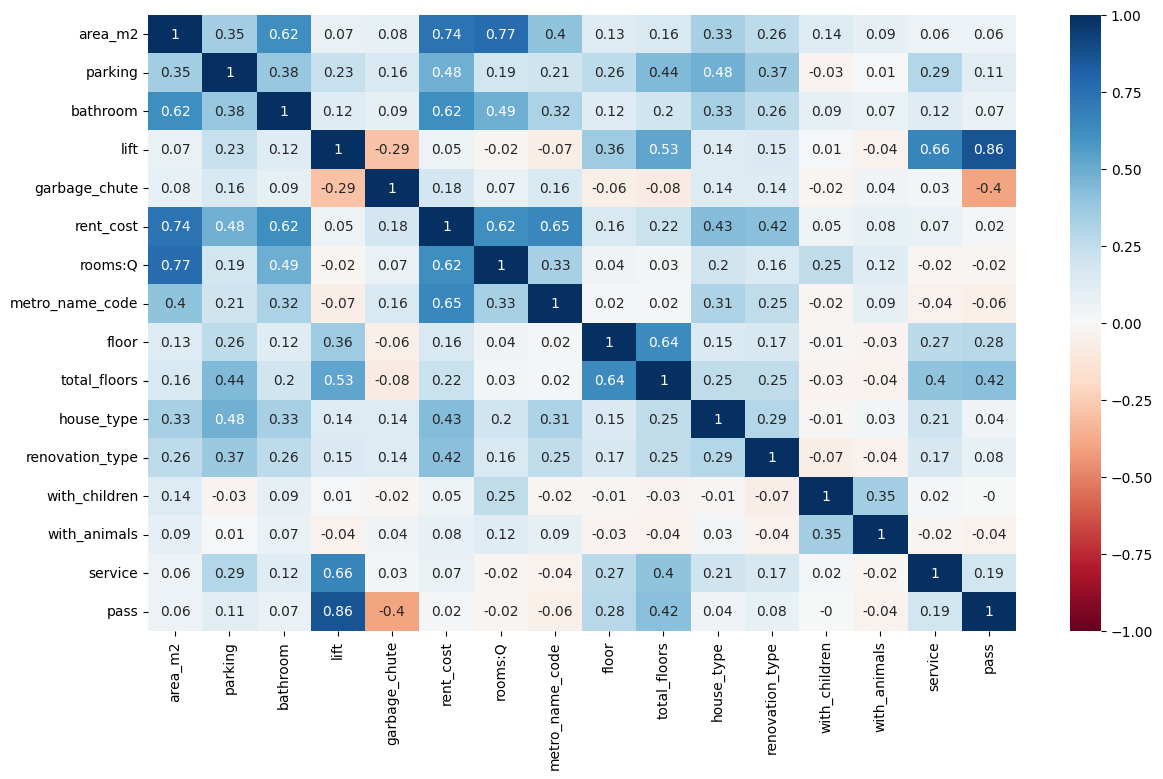

In [107]:
corr_matrix = cian.corr().round(2)
figl, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", vmax=1, vmin=-1);

In [108]:
# удалим лишние нечисловые столбцы
cian = cian.drop(['address', 'description', 'additionally'], axis = 'columns')

In [109]:
# удалим лишние столбцы со слишком маленькой корреляцией с ценой (< 0,2)
cian = cian.drop(['garbage_chute', 'with_children', 'with_animals', 'lift', 'service', 'pass', 'floor'], axis = 'columns')

In [110]:
cian.isna().mean()

area_m2           0.0000
parking           0.0000
bathroom          0.0000
rent_cost         0.0000
rooms:Q           0.0000
metro_name_code   0.0000
total_floors      0.0000
house_type        0.0000
renovation_type   0.0000
dtype: float64

In [111]:
cian.describe()

,area_m2,parking,bathroom,rent_cost,rooms:Q,metro_name_code,total_floors,house_type,renovation_type
count,19004.0000,19004.0000,19004.0000,19004.0000,19004.0000,19004.0000,19004.0000,19004.0000,19004.0000
mean,57.9560,0.1780,0.1289,67687.8554,1.8888,58949.8221,14.4723,54282.6456,53513.7340
std,34.4854,0.3825,0.3351,52970.4191,0.9444,33852.0904,8.5695,17728.3879,15585.3621
min,7.0000,0.0000,0.0000,5000.0000,0.0000,30000.0000,1.0000,37499.5000,35000.0000
25%,38.0000,0.0000,0.0000,39000.0000,1.0000,40000.0000,9.0000,43000.0000,40000.0000
50%,47.0000,0.0000,0.0000,50000.0000,2.0000,47000.0000,13.0000,49000.0000,55000.0000
75%,65.0000,0.0000,0.0000,70000.0000,2.0000,65000.0000,17.0000,70000.0000,55000.0000
max,800.0000,1.0000,1.0000,349999.0000,6.0000,280000.0000,116.0000,195000.0000,90000.0000


In [112]:
cian.sample(3)

,area_m2,parking,bathroom,rent_cost,rooms:Q,metro_name_code,total_floors,house_type,renovation_type
15879,38.0000,0,0,46000.0000,1,61500.0000,17,43000.0000,55000.0000
4050,39.0000,0,0,28000.0000,1,42000.0000,12,49000.0000,40000.0000
9123,40.0000,0,0,37000.0000,2,40000.0000,24,43000.0000,40000.0000


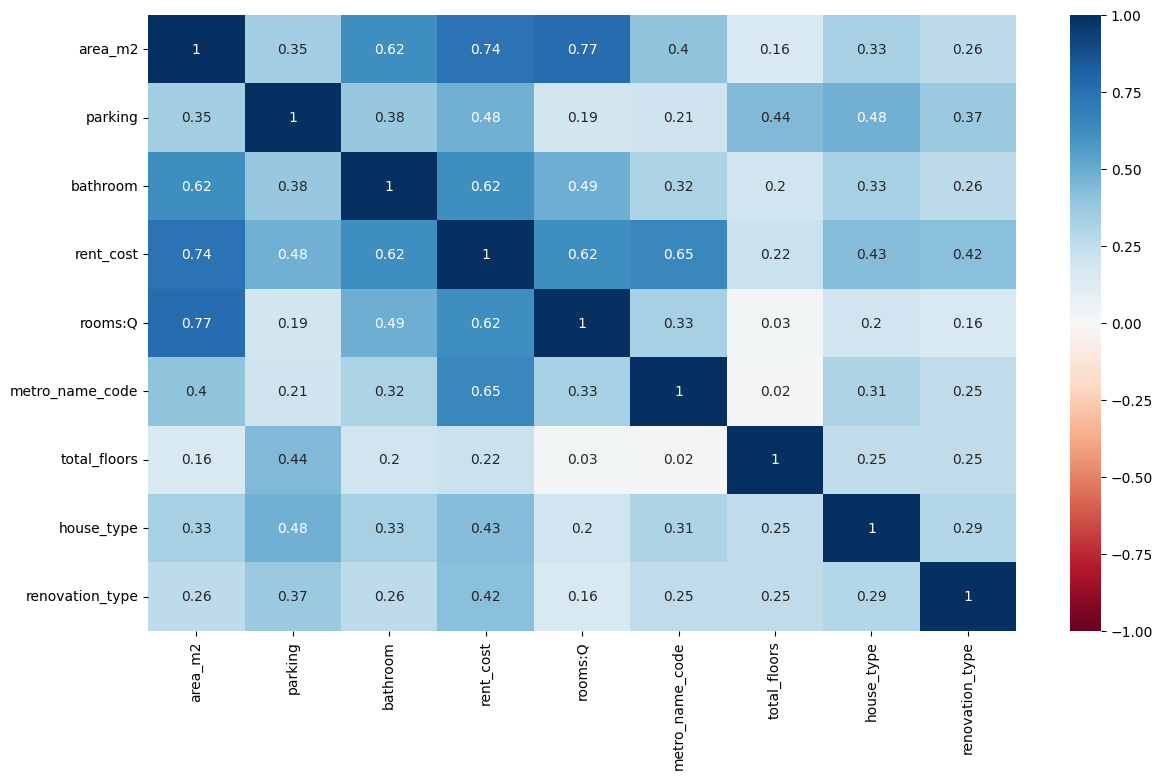

In [113]:
corr_matrix = cian.corr().round(2)
figl, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu", vmax=1, vmin=-1);

In [114]:
cian.to_csv('file.csv') 